# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will be analyzing the TMDb movie data set, which contains about 10,000 movies collected from The Movie Database (TMDb). This dataset contains different genres of movies, information about user ratings, and revenues. I will explore which factors will impact revenues and their relationships with revenues.

> Questions I plan to explore in this report:

> 1. Do movies with higher budget generate higher revenues?
> 2. Do certain genres of movies generate higher revenues than others?
> 3. Do certain time of the year produce more movies than other times? Do movies release in certain time of the year generate higher revenues than other times of the year?
> 4. Do movies that have higher using ratings generate higher revenues?

In [1]:
# Import pandas, numpy, matplotlib, and seabron
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load 'tmdb-movies.csv' data and print out a few lines.
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> From the lines above, we can see some of the columns, like 'genres' and 'production_companies', contain multiple values separated by pipe characters. There are some odd characters in the "cast"column. Columns 'budget_adj' and 'revenue_adj' are hard to read. Columns 'release_date' and 'release_year' all contain the years, which is not necessary. The labels format is consistent with lower case and the underscore as connectors. 

In [3]:
# Check out the shape of the dataframe.
df.shape

(10866, 21)

> There are 10866 rows and 21 columns for this dataframe. Next, I will check if there are any missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> From the info above, we can see that 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', 'production_companies' columns have missing values. 'budget' and 'revenue' columns have data type of integer, which do not match with 'budget_adj' and 'revenue_adj' columns'data type of float. The data type of 'release_date' column should be changed from string to datetime.


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> From data above we can see that the budget is ranging from 0 to 425 million dollars. But about half of the movies have 0 budget. Similarly, revenue is ranging from 0 to 2.82 billion dollars. But about half of the movies generate 0 revenues. Majority of the movies run from 90 minutes to 111 minutes. Although there are movies run 900 minutes! Majority of rating is between 5.4 to 6.6. The lowest rating is 1.5 and the highest rating is 9.2.


### Data Cleaning (drop columns/duplicates, missing data, incorrect datatypes)

> First, I will drop the columns that I won't use and drop rows that have null values. I will drop 'budget' and 'revenue' columns and keep 'budget_adj' and 'revenue_adj' columns because the latter were inflation adjusted to reflect 2010 dollar value. They will make the comparisons more accurate. In the 'budget_adj' and 'revenue_adj' columns, about half of the data equals zero, I will need to investigate these missing values as well.

In [6]:
# Drop the columns that I do not need. Look at several lines.
df.drop(['imdb_id','budget','revenue','cast','director','homepage','tagline','keywords','overview','production_companies','release_year'], axis=1, inplace=True)
df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,1.747999e+08,1.385749e+09


In [7]:
#check which columns have missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
id                10866 non-null int64
popularity        10866 non-null float64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 849.0+ KB


In [8]:
#view missing value counts
df['genres'].isnull().sum()

23

In [9]:
#drop rows with any null values
df.dropna(inplace=True)

> Next, I will check the missing values in 'revenue_adj' and 'budget_adj' columns.

In [10]:
#check the rows where 'revenue_adj' equals zero
df[df['revenue_adj']==0].shape


(5993, 10)

> There are 5993 rows out of 10866 rows with 'revenue_adj' of zero.

In [11]:
#check the rows where 'budget_adj' equals zero
df[df['budget_adj']==0].shape


(5674, 10)

> There are 5674 rows out of 10866 rows with 'budget_adj' of zero. We will need to drop the rows if any value in the row equals zero.

In [12]:
#drop rows if any value in the two rows equals zero
df=df[(df[['budget_adj','revenue_adj']]!=0).all(axis=1)]
df.shape

(3855, 10)

> There are 3855 rows left right now. Next, I will check if there are any duplicates and drop the duplicated row.

In [13]:
#count the duplicates in dataframe
sum(df.duplicated())

1

In [14]:
#drop the duplicated row
df.drop_duplicates(inplace=True)

> Then, I will change data types for 'budget_adj','revenue_adj' and 'release_date' columns. 

In [15]:
#change data type of 'budget_adj' and 'revenue_adj' to integer
df.budget_adj=df.budget_adj.astype(int)
df.revenue_adj=df.revenue_adj.astype(int)

In [16]:
#change data type of 'release_date' to datetime
df.release_date=pd.to_datetime(df.release_date)

In [17]:
#check again to see if all data types are what I want
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
id                3854 non-null int64
popularity        3854 non-null float64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null datetime64[ns]
vote_count        3854 non-null int64
vote_average      3854 non-null float64
budget_adj        3854 non-null int32
revenue_adj       3854 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(2), int64(3), object(2)
memory usage: 301.1+ KB


> Finally, we will need to separate the genres columns by pipe and assign each genre to each movie id.

In [18]:
#separate the genres columns and assign each genre to movie id
df_genres=df.join(df.genres.str.strip('|').str.split('|',expand=True).stack().reset_index(level=1, drop=True).rename('genre')).reset_index(drop=True)
#drop the original 'genres' column
df_genres.drop('genres',axis=1,inplace=True)

In [19]:
#check the above steps to see if we have done right.
df_genres.head()

,id,popularity,original_title,runtime,release_date,vote_count,vote_average,budget_adj,revenue_adj,genre
0,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,137999939,1392445892,Action
1,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,137999939,1392445892,Adventure
2,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,137999939,1392445892,Science Fiction
3,135397,32.985763,Jurassic World,124,2015-06-09,5562,6.5,137999939,1392445892,Thriller
4,76341,28.419936,Mad Max: Fury Road,120,2015-05-13,6185,7.1,137999939,348161292,Action


> Now I have a clean data set. Let's move on the next part to explore the data and answer some questions.

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Do movies with higher budgets generate higher revenues? )

> Create a bar chart with one bar for low budget and one bar for high budget.

In [20]:
#Use query to select each group and get its mean revenue.
median=df_genres.budget_adj.median()
low=df.query('budget_adj<{}'.format(median))
high=df.query('budget_adj>={}'.format(median))
mean_revenue_low=low['revenue_adj'].mean()
mean_revenue_high=high['revenue_adj'].mean()

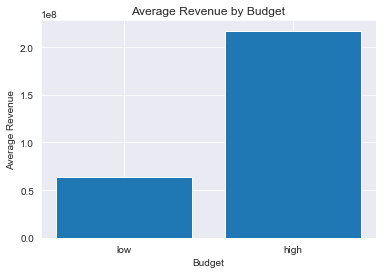

In [21]:
#create a bar chart with proper labels
locations=[1,2]
heights=[mean_revenue_low, mean_revenue_high]
labels=['low','high']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Revenue by Budget')
plt.xlabel('Budget')
plt.ylabel('Average Revenue');

> Conclusion: Looks like movies that devoted higher budget will generate higher revenues later.

### Research Question 2  (Do certain genres of movies generate higher revenues than others?)

In [23]:
#use groupby to get mean revenue for each genre
genre_revenue_means=df_genres.groupby('genre').revenue_adj.mean()
genre_revenue_means

genre
Action             1.862526e+08
Adventure          2.581741e+08
Animation          2.909574e+08
Comedy             1.213085e+08
Crime              1.103951e+08
Documentary        2.480617e+07
Drama              9.627101e+07
Family             2.437910e+08
Fantasy            2.374306e+08
Foreign            1.273378e+07
History            1.216617e+08
Horror             7.208731e+07
Music              1.345660e+08
Mystery            1.136210e+08
Romance            1.065425e+08
Science Fiction    1.830553e+08
TV Movie           5.838910e+07
Thriller           1.207218e+08
War                1.558981e+08
Western            1.356748e+08
Name: revenue_adj, dtype: float64

In [24]:
#make the genre_revenue_mean back to the dataframe. Then sort by 'revenue_adj' descending.
df1=genre_revenue_means.reset_index()
df2=df1.sort_values('revenue_adj', ascending=False)
df2

,genre,revenue_adj
2,Animation,2.909574e+08
1,Adventure,2.581741e+08
7,Family,2.437910e+08
8,Fantasy,2.374306e+08
0,Action,1.862526e+08
15,Science Fiction,1.830553e+08
18,War,1.558981e+08
19,Western,1.356748e+08
12,Music,1.345660e+08
10,History,1.216617e+08


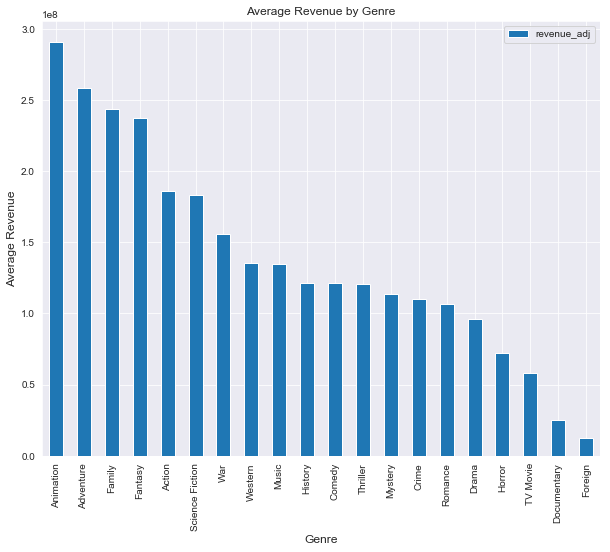

In [25]:
#create bar chart with proper labels
ax=df2.plot(kind="bar", title='Average Revenue by Genre',figsize=(10,8))
ax.set_xticklabels(df2['genre'])
plt.xlabel('Genre',fontsize=12)
plt.ylabel('Average Revenue',fontsize=12);


> Conclusion: From the bar chart above, we can see that Animation and Adventure movies generate the most revenues. Family, Fantasy, and Action movies generate the next highest revenues, while TV Movie, Documentary, and Foreign movies generate very little revenues.

### Research Question 3  (Do certain time of the year produce more movies than other times? Do movies release in certain time of the year generate higher revenues than other times of the year?)

> First, I am going to extract month from column 'release_date' and create a new column for 'month'.

In [26]:
#extract month from column 'release_date' and create a new column 'month'
df['month']=df['release_date'].dt.month
df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,137999939,1392445892,6
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,137999939,348161292,5
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,101199955,271619025,3
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,183999919,1902723129,12
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,174799923,1385748801,4


>Next, we will see if certain months produce more movies than others of the year.

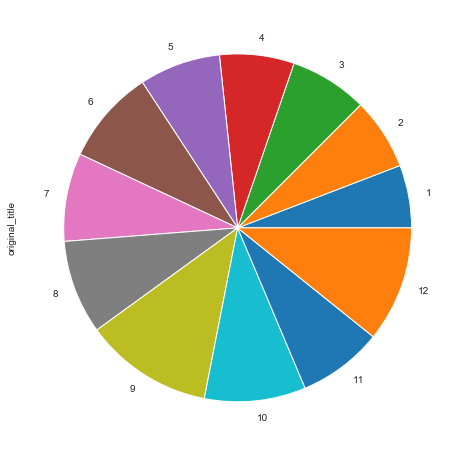

In [27]:
#count number of movies group by each month
counts=df.groupby('month').count()['original_title']
#plot a pie chart 
counts.plot(kind='pie',figsize=(8,8));

> Looks like September and December produce the most movies of the year.
> Next, I will investigate which months of the year generate the most movie revenues.

In [28]:
#calculate the averge movie revenues group by each month
monthly_revenue_means=df.groupby('month')['revenue_adj'].mean()
monthly_revenue_means

month
1     7.146060e+07
2     8.332814e+07
3     1.148546e+08
4     1.110203e+08
5     2.047275e+08
6     2.304416e+08
7     1.747225e+08
8     8.918078e+07
9     6.330897e+07
10    1.012462e+08
11    1.693620e+08
12    1.677914e+08
Name: revenue_adj, dtype: float64

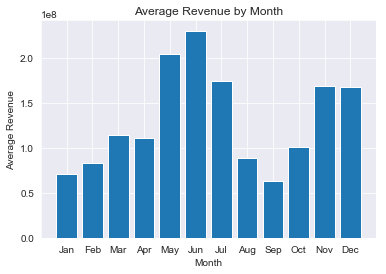

In [29]:
#create a bar chart for average revenue generated by each month
locations=[1,2,3,4,5,6,7,8,9,10,11,12]
heights=monthly_revenue_means
labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Average Revenue');

> Conclusion: From the bar chart above, we can conclude that May, June, July generate the highest revenues. November and December generate the next highest revenues. September generates the lowest revenues of the year.

### Research Question 4  (Do movies that have higher using ratings generate higher revenues?)

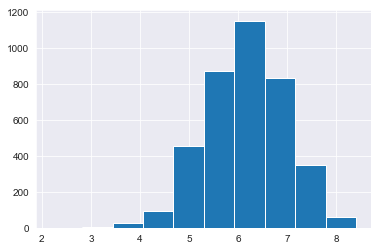

In [30]:
#view the histgram of 'vote_average' to see the distribution
df.vote_average.hist();

> The data is left skewed. Next, we will need to divide the ratings into several groups.

In [31]:
#view the min, 25%, 50%, 75%, max user ratings
df.vote_average.describe()

count    3854.000000
mean        6.168163
std         0.794920
min         2.200000
25%         5.700000
50%         6.200000
75%         6.700000
max         8.400000
Name: vote_average, dtype: float64

In [33]:
#Bin edges that will be used to cut the data into groups
bin_edges=[2.2,5.7,6.2,6.7,8.4]

In [34]:
#label for four user rating groups
bin_names=['low','medium','mod_high','high']

In [35]:
#create a column for user rating
df['user_rating']=pd.cut(df['vote_average'],bin_edges,labels=bin_names)
#run a few lines to see if we have made it correctly
df.head()

,id,popularity,original_title,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj,month,user_rating
0,135397,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,137999939,1392445892,6,mod_high
1,76341,28.419936,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,137999939,348161292,5,high
2,262500,13.112507,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,101199955,271619025,3,mod_high
3,140607,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,183999919,1902723129,12,high
4,168259,9.335014,Furious 7,137,Action|Crime|Thriller,2015-04-01,2947,7.3,174799923,1385748801,4,high


In [36]:
#find the mean revenue for each user rating with groupby
rating_mean_revenue=df.groupby('user_rating').mean().revenue_adj
rating_mean_revenue

user_rating
low         7.642573e+07
medium      1.207044e+08
mod_high    1.430817e+08
high        2.013642e+08
Name: revenue_adj, dtype: float64

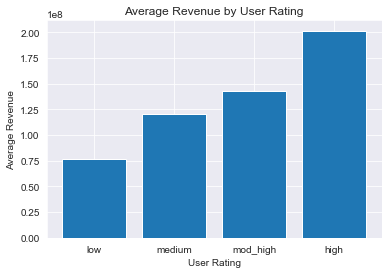

In [37]:
#create a bar chart of average revenue for each user rating
locations=[1,2,3,4]
heights=rating_mean_revenue
labels=['low','medium','mod_high','high']
plt.bar(locations,heights,tick_label=labels)
plt.title('Average Revenue by User Rating')
plt.xlabel('User Rating')
plt.ylabel('Average Revenue');

> Looks like there is a consistent relationship between user rating and average revenue. 

<a id='conclusions'></a>
## Conclusions

>In this TMDb movies dataset, I investigated relationships between revenue(dependent variable) and budget, genres, time, and user ratings (independent variables). My conclusions are:

>1. Movies with higher budgets generate higher revenue.
>2. Animation and Adventure movies generate the most revenues. Family, Fantasy, and Action movies generate the second highest revenues, while TV Movie, Documentary, and Foreign movies generate the least revenues.
>3. September and December produce the most movies of the year. May, June, July generate the highest revenues. November and December generate the second highest revenues. September generate the lowest revenues of the year.
>4. The higher the user ratings, the higher the revenues movies will generate.

> Limitations: During data cleaning, I dropped rows that has missing values of genres, and one duplicated row. I also dropped rows with zero values in either 'revenue_adj' or 'budget_adj' column. These rows may contain important information. The sources of vote_average, vote_count, budget_adj, and revenue_adj are not given, which will make people doubt their accuracy. Finally, if we could know more information about where the movies are shown and how long these movies were shown in theaters, it will be better for us to understand more about the dataset.